In [4]:
import torch
import numpy as np
import json
import h5py
import cv2
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

/opt/anaconda3/envs/mymcnn/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/mymcnn/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: /opt/anaconda3/envs/mymcnn/lib/python3.10/site-packages/torchvision/image.so
  Expected in: /opt/anaconda3/envs/mymcnn/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [18]:
class CrowdCountingDataset(Dataset):
    def __init__(self, img_list_file, transform=None):
        with open(img_list_file, 'r') as f:
            img_list = json.load(f)
            
        self.img_list = img_list
        self.transform = transform

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self, idx):
        img_path = self.img_list[idx]
        gt_path = img_path.replace('.jpg','.h5').replace('images','ground_truth')

        # 读取原图像
        img = Image.open(img_path).convert('RGB')

        # 读取密度图
        with h5py.File(gt_path, 'r') as hf:
            density = np.array(hf['density'])

        # 数据增强
        if self.transform:
            img = self.transform(img)
            
            original_size = density.shape[:2]  # 原始大小

            # 使用OpenCV缩放密度图
            density = cv2.resize(density, (64, 64), interpolation=cv2.INTER_LINEAR)

            # 调整密度图的值以保持总人数不变
            density *= (original_size[0] * original_size[1]) / (64*64)

            density -= density.min()
            density /= density.max()

            # 将numpy数组转换为torch张量
            density = torch.from_numpy(density).float()

        return img, density

In [19]:
# 定义数据增强操作
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

In [20]:
train_data = CrowdCountingDataset('../../shanghaitech/part_A_train.json', transform=transform)

In [27]:
dataloader = DataLoader(train_data, batch_size=1, shuffle=True)

In [28]:
data_iter = iter(dataloader)
imgs, densitys = data_iter.__next__()

In [34]:
den = densitys[0]

In [7]:
from matplotlib import cm as CM

In [53]:
with h5py.File('../../shanghaitech/part_A_final/train_data/ground_truth/IMG_1.h5', 'r') as hf:
    density = np.array(hf['density'])

In [54]:
density

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.5245415e-05, 3.9891562e-05, 4.5005221e-05, ..., 8.3316003e-08,
        7.9835857e-08, 7.6443328e-08],
       [3.3830602e-05, 3.8291390e-05, 4.3201180e-05, ..., 7.5667948e-08,
        7.2507262e-08, 6.9426157e-08],
       [3.2372249e-05, 3.6641646e-05, 4.1340896e-05, ..., 6.8670069e-08,
        6.5801693e-08, 6.3005523e-08]], dtype=float32)

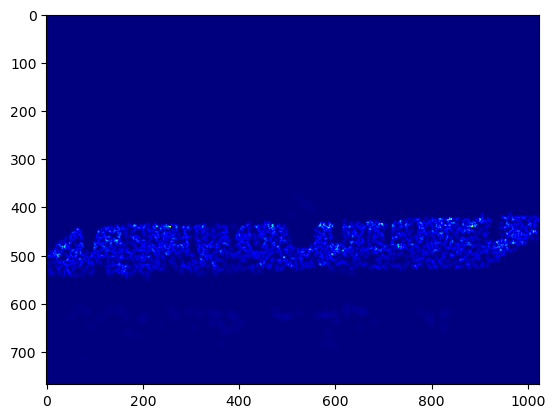

In [55]:
plt.imshow(density, cmap=CM.jet)

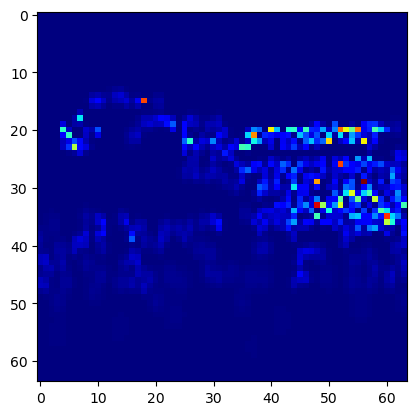

In [49]:
original_size = density.shape[:2]

density = cv2.resize(density, (64, 64), interpolation=cv2.INTER_LINEAR)
plt.imshow(density, cmap=CM.jet)

In [56]:
density

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.5245415e-05, 3.9891562e-05, 4.5005221e-05, ..., 8.3316003e-08,
        7.9835857e-08, 7.6443328e-08],
       [3.3830602e-05, 3.8291390e-05, 4.3201180e-05, ..., 7.5667948e-08,
        7.2507262e-08, 6.9426157e-08],
       [3.2372249e-05, 3.6641646e-05, 4.1340896e-05, ..., 6.8670069e-08,
        6.5801693e-08, 6.3005523e-08]], dtype=float32)

In [57]:
density *= (original_size[0]*original_size[1]) / (64*64)

In [58]:
density

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [5.9917206e-03, 6.7815655e-03, 7.6508876e-03, ..., 1.4163720e-05,
        1.3572096e-05, 1.2995366e-05],
       [5.7512023e-03, 6.5095364e-03, 7.3442007e-03, ..., 1.2863551e-05,
        1.2326234e-05, 1.1802446e-05],
       [5.5032824e-03, 6.2290798e-03, 7.0279525e-03, ..., 1.1673912e-05,
        1.1186288e-05, 1.0710939e-05]], dtype=float32)

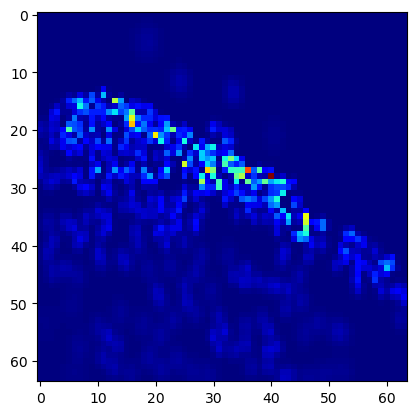

In [63]:
plt.imshow(density, cmap=CM.jet)

In [18]:
density = torch.from_numpy(density).float()

In [19]:
density.unsqueeze(1)
density

torch.Size([64, 64])

In [22]:
density.unsqueeze(1)

tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00]],

        ...,

        [[5.4435e-04, 7.2679e-04, 1.5351e-03,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00]],

        [[1.8779e-04, 3.7557e-04, 1.4636e-03,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00]],

        [[6.5801e-05, 2.4574e-04, 1.3668e-03,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00]]])

In [23]:
density.shape

torch.Size([64, 64])

In [24]:
t = torch.rand(size=(64, 64))

In [28]:
t = t.unsqueeze(1)

In [32]:
imgs[0].shape

torch.Size([3, 256, 256])

In [29]:
t.shape

torch.Size([64, 1, 64])

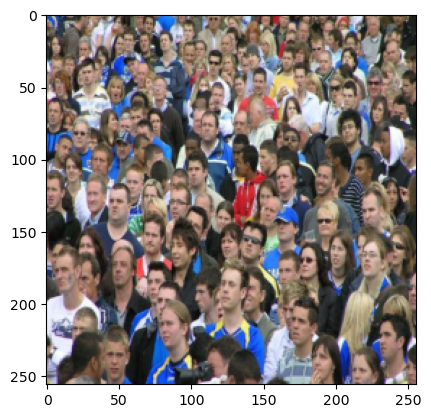

In [33]:
transform = transforms.Compose([transforms.ToPILImage(), ])
img = transform(imgs[0])
plt.imshow(img)

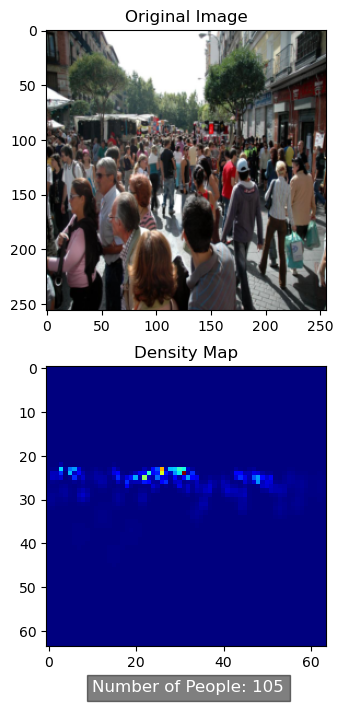

In [15]:
data_iter = iter(dataloader)
imgs, densitys = data_iter.next()

img = imgs[0]
density = densitys[0]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.imshow(img.permute(1, 2, 0))
ax1.set_title('Original Image')
ax2.imshow(density.squeeze(), cmap='jet')
ax2.set_title('Density Map')

num_people = int(np.sum(density.numpy()))
ax2.text(10, density.shape[0]+10, f'Number of People: {num_people}', fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.5))

plt.show()